## ¿Cómo resolver el problema del Titanic para Kaggle con más de un 75% de acierto en nuestra predicción?

Mis perfiles profesionales:
    
[Perfil de GitHub](https://github.com/JosepLopezZ)


[Perfil de LinkedIn](https://www.linkedin.com/in/josep-lopez-lizarte/)

El objetivo es descubrir a través del dataset extraído de Kaggle, con distintos atributos y características, que tipo de personas tenían más probabilidad de sobrevivir en el accidente que hubo con el naufragio del Titanic en 1912.


Descargamos dataset a través de la API de kaggle

In [1]:
# formato kaggle para llamar api y poder subir resultados directamente
!pip install --upgrade kaggle

Requirement already up-to-date: kaggle in c:\users\34662\anaconda3\lib\site-packages (1.5.10)


In [2]:
def extract_data(file_name, file_path):
    !kaggle competitions download titanic -f $file_name -p $file_path  --force

In [3]:
# file names
import os
train_file_names="train.csv"
test_file_names="test.csv"

# file paths

raw_data_path = os.path.join(os.path.pardir,"Titanic_Machine_Learning_From_Disaster")
extract_data(train_file_names, raw_data_path)
extract_data(test_file_names, raw_data_path)


  0%|          | 0.00/59.8k [00:00<?, ?B/s]
100%|##########| 59.8k/59.8k [00:00<00:00, 3.07MB/s]



  0%|          | 0.00/28.0k [00:00<?, ?B/s]
100%|##########| 28.0k/28.0k [00:00<00:00, 5.74MB/s]


In [4]:
# Comprobamos que carpeta con datasets esté creada
import os
os.listdir()

['.ipynb_checkpoints',
 'images',
 'Informe.html',
 'test.csv',
 'test_eda.csv',
 'test_feat.csv',
 'Titanic Kaggle v1.ipynb',
 'Titanic_prediction.csv',
 'train.csv',
 'train_eda.csv',
 'train_feat.csv']

In [5]:
# Revisamos directorio
print("Directorio de trabajo actual ", os.getcwd())

# Configuramos donde guardar imagenes
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "titanic_survived"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# Función para guardar automáticamente las imagenes que generemos
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Directorio de trabajo actual  C:\Users\34662\Escritorio\Projects\Kaggle\Titanic_Machine_Learning_From_Disaster


In [6]:
# Importamos librerías

import pandas as pd
import numpy as np
import random as rnd
import pandas_profiling

# Visualización

import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
train_titanic = pd.read_csv("train.csv")
test_titanic = pd.read_csv("test.csv")

 #### Ahora con todos los datos disponibles, empezemos:
 
 En primer lugar analizamos los datos.

In [8]:
train_titanic.info()
test_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

## Data description

survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [9]:
train_titanic.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

Generamos un informe de la estadística descriptiva para disponerlo en caso de que queramos observarlo cuando queramos

In [10]:
pR = pandas_profiling.ProfileReport(train_titanic)
pR.to_file(output_file="Informe.html")

pandas_profiling.ProfileReport(train_titanic)

In [11]:
# Revisamos valores nulos y NA para el conjunto de train:
na_values = train_titanic.isna().sum()

#Tabla de frecuencia absoluta
na_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# tabla de frecuencia relativa
train_titanic.isnull().sum()/len(train_titanic)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### PassengerId

Eliminamos variable, ya que no aporta valor predictivo

In [13]:
train_titanic.drop(['PassengerId'], axis=1, inplace=True)

### Survived

In [14]:
train_titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

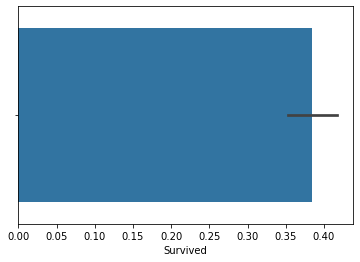

In [15]:
sns.barplot(x="Survived", data=train_titanic)

Ratio de superviviencia 65-35 aproximadamente.

### Sex

In [16]:
train_titanic[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean()

Sex  Survived
0  female  0.742038
1    male  0.188908

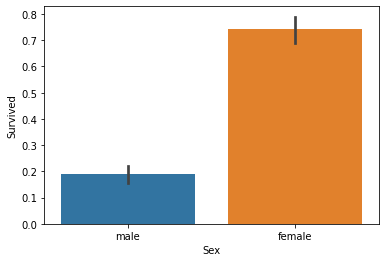

In [17]:
sns.barplot(x="Sex", y="Survived", data=train_titanic)

In [18]:
# Pasamos a True o False si son hombres o mujeres
train_titanic["Sex"] = train_titanic["Sex"] == "male"
test_titanic["Sex"] = test_titanic["Sex"] == "male"

### FamilySize

Generamos nueva variable de tamaño de familias a través de SibSPp y Parch:

In [19]:
# Creamos un nuevo parámetro para aumentar el modelo y disponer de más variables
train_titanic["FamilySize"] = train_titanic["SibSp"] + train_titanic["Parch"] + 1
train_titanic[["FamilySize", "Survived"]].groupby(["FamilySize"], as_index=False).mean()

FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000

In [20]:
# Aplicamos lo mismo al test
test_titanic["FamilySize"] = test_titanic["SibSp"] + test_titanic["Parch"] + 1

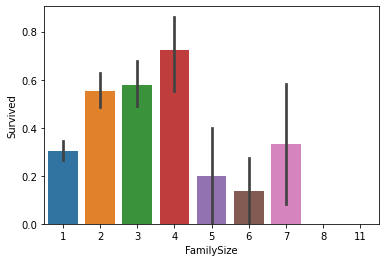

In [21]:
# Vemos familias por tamaño y la tasa de sobrevivir
sns.barplot(x="FamilySize", y="Survived", data=train_titanic)

### IsAlone

Generamos nueva variable de personas que sobrevivieron y iban solas

In [22]:
train_titanic["IsAlone"] = 0
train_titanic.loc[train_titanic["FamilySize"] == 1, "IsAlone"] = 1
train_titanic[["IsAlone", "Survived"]].groupby(["IsAlone"], as_index=False).mean()

IsAlone  Survived
0        0  0.505650
1        1  0.303538

In [23]:
# Igual para el test
test_titanic["IsAlone"] = 0
test_titanic.loc[test_titanic["FamilySize"] == 1, "IsAlone"] = 1

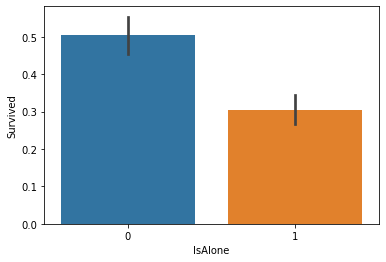

In [24]:
sns.barplot(x="IsAlone", y="Survived", data=train_titanic)

### Ticket

Rechazamos usar la variable de Ticket

In [25]:
train_titanic.drop(["Ticket"], axis=1, inplace=True)
test_titanic.drop(["Ticket"], axis=1, inplace=True)

### Embarked

Rellenamos los datos vaciós de la variable "Embarked" por los más frecuentes

In [26]:
train_titanic[["Embarked", "Survived"]].groupby(["Embarked"], as_index=False).mean()

Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957

In [27]:
# Llenamos por frecuencia
train_titanic["Embarked"] =train_titanic["Embarked"].fillna("S")

In [28]:
# Igual para el conjunto de test
test_titanic["Embarked"] =test_titanic["Embarked"].fillna("S")

### Fare

Ahora veamos la variable "Fare", sobre las tarifas, habrá que normalizar/estandarizar los valores

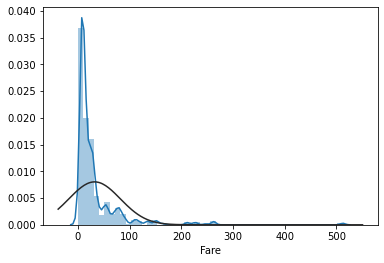

In [29]:
sns.distplot(train_titanic["Fare"], fit=norm)

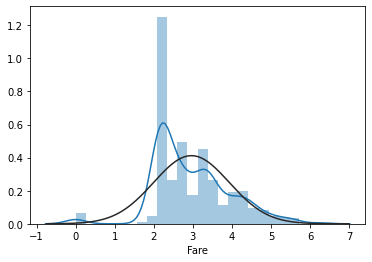

In [30]:
# Aplicamos logarítmico
train_titanic["Fare"] = np.log1p(train_titanic["Fare"])
sns.distplot(train_titanic["Fare"], fit=norm)

Creamos una nueva variable, donde dividimos las tarifas en 4 grupos, por lo que pasamos la variable a categórica:


In [31]:
train_titanic["FareGroup"] = pd.qcut(train_titanic["Fare"], 4, labels=["A", "B", 'C', 'D'])
train_titanic[["FareGroup", "Survived"]].groupby(["FareGroup"], as_index=False).mean()

FareGroup  Survived
0         A  0.197309
1         B  0.303571
2         C  0.454955
3         D  0.581081

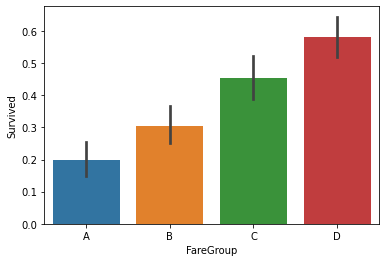

In [32]:
sns.barplot(x="FareGroup", y="Survived", data=train_titanic)

In [33]:
# Aplicamos en test
test_titanic["Fare"] = np.log1p(test_titanic["Fare"])
test_titanic["FareGroup"] = pd.qcut(test_titanic["Fare"], 4, labels=["A", "B", 'C', 'D'])

In [34]:
# Eliminamos la variable "Fare", ya que está estandarizada y no da cifras reales
train_titanic.drop(["Fare"], axis=1, inplace=True)
test_titanic.drop(["Fare"], axis=1, inplace=True)

### Cabin

In [35]:
# Tratamos la variable Cabina
train_titanic["InCabin"] = ~train_titanic["Cabin"].isnull()
test_titanic["InCabin"] = ~test_titanic["Cabin"].isnull()

Convertimos el nombre de la cabina en una variable binaria, que indica si el pasajero estaba o no en una cabina.

In [36]:
pd.unique(train_titanic['Cabin'])

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [37]:
train_titanic["Cabin"].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F33            3
F2             3
              ..
B42            1
E46            1
A32            1
C103           1
C50            1
Name: Cabin, Length: 147, dtype: int64

In [38]:
train_titanic["Cabin_Data"] = train_titanic["Cabin"].isnull().apply(lambda x: not x)
test_titanic["Cabin_Data"] = test_titanic["Cabin"].isnull().apply(lambda x: not x)

Creamos cubiertas y habitaciones

In [39]:
train_titanic["Deck"] = train_titanic["Cabin"].str.slice(0,1)
train_titanic["Room"] = train_titanic["Cabin"].str.slice(1,5).str.extract("([0-9]+)", expand=False).astype("float")
train_titanic[train_titanic["Cabin_Data"]]

Survived  Pclass                                               Name  \
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
6           0       1                            McCarthy, Mr. Timothy J   
10          1       3                    Sandstrom, Miss. Marguerite Rut   
11          1       1                           Bonnell, Miss. Elizabeth   
..        ...     ...                                                ...   
871         1       1   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)   
872         0       1                           Carlsson, Mr. Frans Olof   
879         1       1      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)   
887         1       1                       Graham, Miss. Margaret Edith   
889         1       1                              Behr, Mr. Karl Howell   

       Sex   Age  SibSp  Parch        Cabin Embarked  FamilySize  IsAlone  \
1    False  38.0      1      0          C85        C           2        0   
3    False  35.0      1      0         C123        S           2        0   
6     True  54.0      0      0          E46        S           1        1   
10   False   4.0      1      1           G6        S           3        0   
11   False  58.0      0      0         C103        S           1        1   
..     ...   ...    ...    ...          ...      ...         ...      ...   
871  False  47.0      1      1          D35        S           3        0   
872   True  33.0      0      0  B51 B53 B55        S           1        1   
879  False  56.0      0      1          C50        C           2        0   
887  False  19.0      0      0          B42        S           1        1   
889   True  26.0      0      0         C148        C           1        1   

    FareGroup  InCabin  Cabin_Data Deck   Room  
1           D     True        True    C   85.0  
3           D     True        True    C  123.0  
6           D     True        True    E   46.0  
10          C     True        True    G    6.0  
11          C     True        True    C  103.0  
..        ...      ...         ...  ...    ...  
871         D     True        True    D   35.0  
872         A     True        True    B   51.0  
879         D     True        True    C   50.0  
887         C     True        True    B   42.0  
889         C     True        True    C  148.0  

[204 rows x 16 columns]

In [40]:
test_titanic["Deck"] = test_titanic["Cabin"].str.slice(0,1)
test_titanic["Room"] = test_titanic["Cabin"].str.slice(1,5).str.extract("([0-9]+)", expand=False).astype("float")
test_titanic[test_titanic["Cabin_Data"]]

PassengerId  Pclass                                               Name  \
12           904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
14           906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
24           916       1    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)   
26           918       1                       Ostby, Miss. Helene Ragnhild   
28           920       1                            Brady, Mr. John Bertram   
..           ...     ...                                                ...   
404         1296       1                       Frauenthal, Mr. Isaac Gerald   
405         1297       2       Nourney, Mr. Alfred (Baron von Drachstedt")"   
407         1299       1                         Widener, Mr. George Dunton   
411         1303       1    Minahan, Mrs. William Edward (Lillian E Thorpe)   
414         1306       1                       Oliva y Ocana, Dona. Fermina   

       Sex   Age  SibSp  Parch            Cabin Embarked  FamilySize  IsAlone  \
12   False  23.0      1      0              B45        S           2        0   
14   False  47.0      1      0              E31        S           2        0   
24   False  48.0      1      3  B57 B59 B63 B66        C           5        0   
26   False  22.0      0      1              B36        C           2        0   
28    True  41.0      0      0              A21        S           1        1   
..     ...   ...    ...    ...              ...      ...         ...      ...   
404   True  43.0      1      0              D40        C           2        0   
405   True  20.0      0      0              D38        C           1        1   
407   True  50.0      1      1              C80        C           3        0   
411  False  37.0      1      0              C78        Q           2        0   
414  False  39.0      0      0             C105        C           1        1   

    FareGroup  InCabin  Cabin_Data Deck   Room  
12          D     True        True    B   45.0  
14          D     True        True    E   31.0  
24          D     True        True    B   57.0  
26          D     True        True    B   36.0  
28          C     True        True    A   21.0  
..        ...      ...         ...  ...    ...  
404         C     True        True    D   40.0  
405         B     True        True    D   38.0  
407         D     True        True    C   80.0  
411         D     True        True    C   78.0  
414         D     True        True    C  105.0  

[91 rows x 16 columns]

Arreglamos las variables Deck y Room para retirar los datos vacíos y generamos grupos por habitaciones. Llenamos los valores vacios con la letra mas inusual para rellenar en el caso de "Deck", y con la media en el caso de "Room"

In [41]:
train_titanic["Deck"] = train_titanic["Deck"].fillna("N")
train_titanic["Room"] = round(train_titanic["Room"].fillna(train_titanic["Room"].mean()),0).astype("int")

In [42]:
test_titanic["Deck"] = test_titanic["Deck"].fillna("N")
test_titanic["Room"] = round(test_titanic["Room"].fillna(test_titanic["Room"].mean()),0).astype("int")

In [43]:
train_titanic.head(10)

Survived  Pclass                                               Name    Sex  \
0         0       3                            Braund, Mr. Owen Harris   True   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  False   
2         1       3                             Heikkinen, Miss. Laina  False   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  False   
4         0       3                           Allen, Mr. William Henry   True   
5         0       3                                   Moran, Mr. James   True   
6         0       1                            McCarthy, Mr. Timothy J   True   
7         0       3                     Palsson, Master. Gosta Leonard   True   
8         1       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  False   
9         1       2                Nasser, Mrs. Nicholas (Adele Achem)  False   

    Age  SibSp  Parch Cabin Embarked  FamilySize  IsAlone FareGroup  InCabin  \
0  22.0      1      0   NaN        S           2        0         A    False   
1  38.0      1      0   C85        C           2        0         D     True   
2  26.0      0      0   NaN        S           1        1         B    False   
3  35.0      1      0  C123        S           2        0         D     True   
4  35.0      0      0   NaN        S           1        1         B    False   
5   NaN      0      0   NaN        Q           1        1         B    False   
6  54.0      0      0   E46        S           1        1         D     True   
7   2.0      3      1   NaN        S           5        0         C    False   
8  27.0      0      2   NaN        S           3        0         B    False   
9  14.0      1      0   NaN        C           2        0         C    False   

   Cabin_Data Deck  Room  
0       False    N    50  
1        True    C    85  
2       False    N    50  
3        True    C   123  
4       False    N    50  
5       False    N    50  
6        True    E    46  
7       False    N    50  
8       False    N    50  
9       False    N    50

In [44]:
bins = [0, 50, 75, 100, np.inf]
labels = ["r1", "r2", "r3", "r4"]
train_titanic["RoomGroup"] = pd.cut(train_titanic["Room"], bins, labels = labels)
test_titanic["RoomGroup"] = pd.cut(test_titanic["Room"], bins, labels = labels)

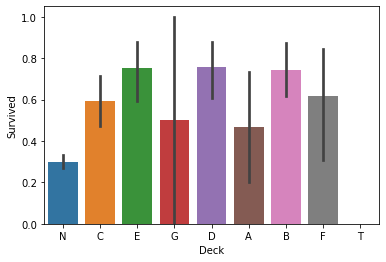

In [45]:
sns.barplot(x="Deck", y="Survived", data=train_titanic)

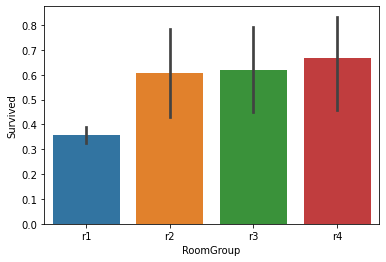

In [46]:
sns.barplot(x="RoomGroup", y="Survived", data=train_titanic)

Eliminamos variables innecesarias a estas alturas, a excepción de Deck

In [47]:
train_titanic.drop(["Cabin", "Cabin_Data", "Room"], axis=1, inplace=True, errors="ignore")
test_titanic.drop(["Cabin", "Cabin_Data", "Room"], axis=1, inplace=True, errors="ignore")

### Age

Completamos los valores que faltan en la variable Edad y generamos una categórica por grupos de edad.

In [48]:
train_titanic["Age"] = train_titanic["Age"].fillna(-0.5)
test_titanic["Age"] = test_titanic["Age"].fillna(-0.5)
bins=[-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ["Unknown", "Baby", "Child", "Teenager", "Student", "Young Adult", "Adut", "Senior"]
train_titanic["AgeGroup"] = pd.cut(train_titanic["Age"], bins, labels = labels)
test_titanic["AgeGroup"] = pd.cut(test_titanic["Age"], bins, labels = labels)

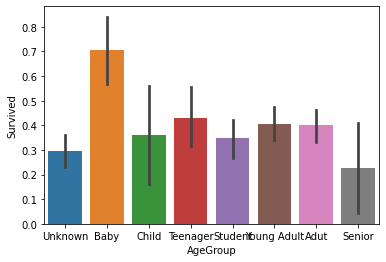

In [49]:
sns.barplot(x="AgeGroup", y="Survived", data=train_titanic)
plt.show()

In [50]:
# Eliminamos la variable edad
train_titanic.drop(["Age"], axis=1, inplace=True)
test_titanic.drop(["Age"], axis=1, inplace=True)

### Name

En el caso de los nombres, utilizaremos una técnica de agrupación por los títulos de los mismos, y agruparemos según la frecuencia o la rareza de los mismos.

In [51]:
train_titanic["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [52]:
import re
def get_title(name):
    title_search = re.search(" ([A-Za-z]+)\.", name)
    if title_search:
        return title_search.group(1)
    return ""

# Aplicamos función de titulo
train_titanic["Title"] = train_titanic["Name"].apply(get_title)
test_titanic["Title"] = test_titanic["Name"].apply(get_title)

# Miramos resultados
pd.crosstab(train_titanic["Title"], train_titanic["Sex"])

Sex       False  True 
Title                 
Capt          0      1
Col           0      2
Countess      1      0
Don           0      1
Dr            1      6
Jonkheer      0      1
Lady          1      0
Major         0      2
Master        0     40
Miss        182      0
Mlle          2      0
Mme           1      0
Mr            0    517
Mrs         125      0
Ms            1      0
Rev           0      6
Sir           0      1

In [53]:
# Realizamos un acotado categórico de todos los que nos aparecen
train_titanic["Title"] = train_titanic["Title"].replace(["Lady", "Countess", "Capt", "Col", "Don", "Dr","Jonkheer","Rev","Sir","Major", "Dona"],"Rare")
train_titanic["Title"] = train_titanic["Title"].replace("Mlle", "Miss")
train_titanic["Title"] = train_titanic["Title"].replace("Ms", "Miss")
train_titanic["Title"] = train_titanic["Title"].replace("Mme", "Mrs")

#Tabla relativa
train_titanic[["Title", "Survived"]].groupby(["Title"], as_index=False).mean()

Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826

In [79]:
test_titanic["Title"] = test_titanic["Title"].replace(["Lady", "Countess", "Capt", "Col", "Don","Dona", "Dr","Jonkheer","Rev","Sir","Major"],"Rare")
test_titanic["Title"] = test_titanic["Title"].replace("Mlle", "Miss")
test_titanic["Title"] = test_titanic["Title"].replace("Ms", "Miss")
test_titanic["Title"] = test_titanic["Title"].replace("Mme", "Mrs")

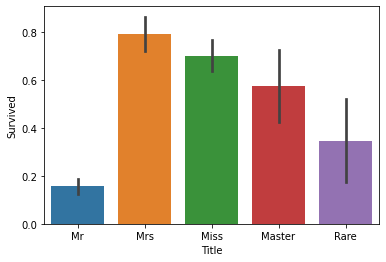

In [80]:
sns.barplot(x="Title", y="Survived", data=train_titanic)

In [81]:
# Eliminamos la variable "Name"
train_titanic.drop(["Name"], axis=1, inplace=True)
test_titanic.drop(["Name"], axis=1, inplace=True)

KeyError: "['Name'] not found in axis"

In [82]:
train_titanic.shape, test_titanic.shape

((891, 14), (418, 14))

In [83]:
train_titanic.head(5)

Survived  Pclass    Sex     SibSp     Parch Embarked  FamilySize  IsAlone  \
0         0       3   True  0.432793 -0.473674        S    0.059160        0   
1         1       1  False  0.432793 -0.473674        C    0.059160        0   
2         1       3  False -0.474545 -0.473674        S   -0.560975        1   
3         1       1  False  0.432793 -0.473674        S    0.059160        0   
4         0       3   True -0.474545 -0.473674        S   -0.560975        1   

  FareGroup  InCabin Deck RoomGroup     AgeGroup Title  
0         A    False    N        r1      Student    Mr  
1         D     True    C        r3         Adut   Mrs  
2         B    False    N        r1  Young Adult  Miss  
3         D     True    C        r4  Young Adult   Mrs  
4         B    False    N        r1  Young Adult    Mr

In [84]:
test_titanic.head(5)

PassengerId  Pclass    Sex  SibSp  Parch Embarked  FamilySize  IsAlone  \
0          892       3   True      0      0        Q           1        1   
1          893       3  False      1      0        S           2        0   
2          894       2   True      0      0        Q           1        1   
3          895       3   True      0      0        S           1        1   
4          896       3  False      1      1        S           3        0   

  FareGroup  InCabin Deck RoomGroup     AgeGroup Title  
0         A    False    N        r1  Young Adult    Mr  
1         A    False    N        r1         Adut   Mrs  
2         B    False    N        r1       Senior    Mr  
3         B    False    N        r1  Young Adult    Mr  
4         B    False    N        r1      Student   Mrs

### Wrangle - Featuring Engineering

In [85]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

# data mining
#from sklearn.impute import KNNImputer, MissingIndicator, SimpleImputer
from sklearn import impute
from sklearn.pipeline import make_pipeline, make_union
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# machine learning
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

## scikit modeling libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

## Load metrics for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE, rfe
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Save the model
import pickle
import joblib


## Warnings and other tools
import itertools
import warnings
warnings.filterwarnings("ignore")

In [86]:
# Guardamos los dataset 1 para iniciar el modelaje y cleansing
train_titanic.to_csv("train_eda.csv", index=False)
test_titanic.to_csv("test_eda.csv", index=False)

In [87]:
df1 = pd.read_csv("train_eda.csv")
df1.head()

Survived  Pclass    Sex     SibSp     Parch Embarked  FamilySize  IsAlone  \
0         0       3   True  0.432793 -0.473674        S    0.059160        0   
1         1       1  False  0.432793 -0.473674        C    0.059160        0   
2         1       3  False -0.474545 -0.473674        S   -0.560975        1   
3         1       1  False  0.432793 -0.473674        S    0.059160        0   
4         0       3   True -0.474545 -0.473674        S   -0.560975        1   

  FareGroup  InCabin Deck RoomGroup     AgeGroup Title  
0         A    False    N        r1      Student    Mr  
1         D     True    C        r3         Adut   Mrs  
2         B    False    N        r1  Young Adult  Miss  
3         D     True    C        r4  Young Adult   Mrs  
4         B    False    N        r1  Young Adult    Mr

In [88]:
df2 = pd.read_csv("test_eda.csv")
df2.head()

PassengerId  Pclass    Sex  SibSp  Parch Embarked  FamilySize  IsAlone  \
0          892       3   True      0      0        Q           1        1   
1          893       3  False      1      0        S           2        0   
2          894       2   True      0      0        Q           1        1   
3          895       3   True      0      0        S           1        1   
4          896       3  False      1      1        S           3        0   

  FareGroup  InCabin Deck RoomGroup     AgeGroup Title  
0         A    False    N        r1  Young Adult    Mr  
1         A    False    N        r1         Adut   Mrs  
2         B    False    N        r1       Senior    Mr  
3         B    False    N        r1  Young Adult    Mr  
4         B    False    N        r1      Student   Mrs

Una vez hemos arreglado todas las variables de nuestro dataset, procedemos a la fase de selección de las mismas y la puesta apunto para entrenar el mejor modelo. 

Podríamos entrenarlos en otro Notebook, pero lo seguiremos en este para tener un entremaniento más compacto.

## Training and Validation dataset

In [89]:
PassengerId = test_titanic['PassengerId']
X = train_titanic
Y = test_titanic.drop('PassengerId', axis=1).copy()

In [90]:
PassengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [91]:
Y

Pclass    Sex  SibSp  Parch Embarked  FamilySize  IsAlone FareGroup  \
0         3   True      0      0        Q           1        1         A   
1         3  False      1      0        S           2        0         A   
2         2   True      0      0        Q           1        1         B   
3         3   True      0      0        S           1        1         B   
4         3  False      1      1        S           3        0         B   
..      ...    ...    ...    ...      ...         ...      ...       ...   
413       3   True      0      0        S           1        1         B   
414       1  False      0      0        C           1        1         D   
415       3   True      0      0        S           1        1         A   
416       3   True      0      0        S           1        1         B   
417       3   True      1      1        C           3        0         C   

     InCabin Deck RoomGroup     AgeGroup   Title  
0      False    N        r1  Young Adult      Mr  
1      False    N        r1         Adut     Mrs  
2      False    N        r1       Senior      Mr  
3      False    N        r1  Young Adult      Mr  
4      False    N        r1      Student     Mrs  
..       ...  ...       ...          ...     ...  
413    False    N        r1      Unknown      Mr  
414     True    C        r4         Adut    Rare  
415    False    N        r1         Adut      Mr  
416    False    N        r1      Unknown      Mr  
417    False    N        r1      Unknown  Master  

[418 rows x 13 columns]

### StandardScaler

Vamos a escalar dimensiones de distintas variables de nuestro dataset. (SibSp, Parch, FamilySize)

Primero combinamos nuestros train y test dataset:

In [92]:
dataset = [X, Y]

In [93]:
col_Z = ['SibSp', 'Parch', 'FamilySize']

In [94]:
from sklearn.preprocessing import StandardScaler

features = dataset[0][col_Z]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [95]:
dataset[0][col_Z] = features
dataset[0].head(10)

Survived  Pclass    Sex     SibSp     Parch Embarked  FamilySize  IsAlone  \
0         0       3   True  0.432793 -0.473674        S    0.059160        0   
1         1       1  False  0.432793 -0.473674        C    0.059160        0   
2         1       3  False -0.474545 -0.473674        S   -0.560975        1   
3         1       1  False  0.432793 -0.473674        S    0.059160        0   
4         0       3   True -0.474545 -0.473674        S   -0.560975        1   
5         0       3   True -0.474545 -0.473674        Q   -0.560975        1   
6         0       1   True -0.474545 -0.473674        S   -0.560975        1   
7         0       3   True  2.247470  0.767630        S    1.919564        0   
8         1       3  False -0.474545  2.008933        S    0.679295        0   
9         1       2  False  0.432793 -0.473674        C    0.059160        0   

  FareGroup  InCabin Deck RoomGroup     AgeGroup   Title  
0         A    False    N        r1      Student      Mr  
1         D     True    C        r3         Adut     Mrs  
2         B    False    N        r1  Young Adult    Miss  
3         D     True    C        r4  Young Adult     Mrs  
4         B    False    N        r1  Young Adult      Mr  
5         B    False    N        r1      Unknown      Mr  
6         D     True    E        r1         Adut      Mr  
7         C    False    N        r1         Baby  Master  
8         B    False    N        r1  Young Adult     Mrs  
9         C    False    N        r1     Teenager     Mrs

In [96]:
features = dataset[1][col_Z]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [97]:
dataset[1][col_Z] = features
dataset[1].head(10)

Pclass    Sex     SibSp     Parch Embarked  FamilySize  IsAlone FareGroup  \
0       3   True -0.499470 -0.400248        Q   -0.553443        1         A   
1       3  False  0.616992 -0.400248        S    0.105643        0         A   
2       2   True -0.499470 -0.400248        Q   -0.553443        1         B   
3       3   True -0.499470 -0.400248        S   -0.553443        1         B   
4       3  False  0.616992  0.619896        S    0.764728        0         B   
5       3   True -0.499470 -0.400248        S   -0.553443        1         B   
6       3  False -0.499470 -0.400248        Q   -0.553443        1         A   
7       2   True  0.616992  0.619896        S    0.764728        0         C   
8       3  False -0.499470 -0.400248        C   -0.553443        1         A   
9       3   True  1.733455 -0.400248        S    0.764728        0         C   

   InCabin Deck RoomGroup     AgeGroup Title  
0    False    N        r1  Young Adult    Mr  
1    False    N        r1         Adut   Mrs  
2    False    N        r1       Senior    Mr  
3    False    N        r1  Young Adult    Mr  
4    False    N        r1      Student   Mrs  
5    False    N        r1     Teenager    Mr  
6    False    N        r1  Young Adult  Miss  
7    False    N        r1  Young Adult    Mr  
8    False    N        r1     Teenager   Mrs  
9    False    N        r1      Student    Mr

### De variables categóricas a binarias

In [98]:
cols = ["Pclass", "Embarked", "AgeGroup", "Title", "Deck", "RoomGroup", "FareGroup"]
titanic_categorical = dataset[0][cols]
titanic_categorical = pd.concat([pd.get_dummies(titanic_categorical[col], prefix=col) for col in titanic_categorical], axis=1)
titanic_categorical.head()
dataset[0] = pd.concat([dataset[0][dataset[0].columns[~dataset[0].columns.isin(cols)]], titanic_categorical], axis=1)
dataset[0].head()

Survived    Sex     SibSp     Parch  FamilySize  IsAlone  InCabin  \
0         0   True  0.432793 -0.473674    0.059160        0    False   
1         1  False  0.432793 -0.473674    0.059160        0     True   
2         1  False -0.474545 -0.473674   -0.560975        1    False   
3         1  False  0.432793 -0.473674    0.059160        0     True   
4         0   True -0.474545 -0.473674   -0.560975        1    False   

   Pclass_1  Pclass_2  Pclass_3  ...  Deck_N  Deck_T  RoomGroup_r1  \
0         0         0         1  ...       1       0             1   
1         1         0         0  ...       0       0             0   
2         0         0         1  ...       1       0             1   
3         1         0         0  ...       0       0             0   
4         0         0         1  ...       1       0             1   

   RoomGroup_r2  RoomGroup_r3  RoomGroup_r4  FareGroup_A  FareGroup_B  \
0             0             0             0            1            0   
1             0             1             0            0            0   
2             0             0             0            0            1   
3             0             0             1            0            0   
4             0             0             0            0            1   

   FareGroup_C  FareGroup_D  
0            0            0  
1            0            1  
2            0            0  
3            0            1  
4            0            0  

[5 rows x 43 columns]

In [99]:
titanic_categorical = dataset[1][cols]
titanic_categorical = pd.concat([pd.get_dummies(titanic_categorical[col], prefix=col) for col in titanic_categorical], axis=1)
dataset[1] = pd.concat([dataset[1][dataset[1].columns[~dataset[1].columns.isin(cols)]], titanic_categorical], axis=1)
dataset[1].head()

Sex     SibSp     Parch  FamilySize  IsAlone  InCabin  Pclass_1  \
0   True -0.499470 -0.400248   -0.553443        1    False         0   
1  False  0.616992 -0.400248    0.105643        0    False         0   
2   True -0.499470 -0.400248   -0.553443        1    False         0   
3   True -0.499470 -0.400248   -0.553443        1    False         0   
4  False  0.616992  0.619896    0.764728        0    False         0   

   Pclass_2  Pclass_3  Embarked_C  ...  Deck_G  Deck_N  RoomGroup_r1  \
0         0         1           0  ...       0       1             1   
1         0         1           0  ...       0       1             1   
2         1         0           0  ...       0       1             1   
3         0         1           0  ...       0       1             1   
4         0         1           0  ...       0       1             1   

   RoomGroup_r2  RoomGroup_r3  RoomGroup_r4  FareGroup_A  FareGroup_B  \
0             0             0             0            1            0   
1             0             0             0            1            0   
2             0             0             0            0            1   
3             0             0             0            0            1   
4             0             0             0            0            1   

   FareGroup_C  FareGroup_D  
0            0            0  
1            0            0  
2            0            0  
3            0            0  
4            0            0  

[5 rows x 41 columns]

In [100]:
# Eliminamos Deck_T de dataste[0]
dataset[0].columns.tolist()

['Survived',
 'Sex',
 'SibSp',
 'Parch',
 'FamilySize',
 'IsAlone',
 'InCabin',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'AgeGroup_Unknown',
 'AgeGroup_Baby',
 'AgeGroup_Child',
 'AgeGroup_Teenager',
 'AgeGroup_Student',
 'AgeGroup_Young Adult',
 'AgeGroup_Adut',
 'AgeGroup_Senior',
 'Title_Master',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Rare',
 'Deck_A',
 'Deck_B',
 'Deck_C',
 'Deck_D',
 'Deck_E',
 'Deck_F',
 'Deck_G',
 'Deck_N',
 'Deck_T',
 'RoomGroup_r1',
 'RoomGroup_r2',
 'RoomGroup_r3',
 'RoomGroup_r4',
 'FareGroup_A',
 'FareGroup_B',
 'FareGroup_C',
 'FareGroup_D']

In [101]:
dataset[1].columns.tolist()

['Sex',
 'SibSp',
 'Parch',
 'FamilySize',
 'IsAlone',
 'InCabin',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'AgeGroup_Unknown',
 'AgeGroup_Baby',
 'AgeGroup_Child',
 'AgeGroup_Teenager',
 'AgeGroup_Student',
 'AgeGroup_Young Adult',
 'AgeGroup_Adut',
 'AgeGroup_Senior',
 'Title_Master',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Rare',
 'Deck_A',
 'Deck_B',
 'Deck_C',
 'Deck_D',
 'Deck_E',
 'Deck_F',
 'Deck_G',
 'Deck_N',
 'RoomGroup_r1',
 'RoomGroup_r2',
 'RoomGroup_r3',
 'RoomGroup_r4',
 'FareGroup_A',
 'FareGroup_B',
 'FareGroup_C',
 'FareGroup_D']

In [102]:
# Eliminamos `Deck_T` por estar incluida en testing
dataset[0] = dataset[0].drop('Deck_T', axis=1).copy()

In [103]:
dataset[0]

Survived    Sex     SibSp     Parch  FamilySize  IsAlone  InCabin  \
0           0   True  0.432793 -0.473674    0.059160        0    False   
1           1  False  0.432793 -0.473674    0.059160        0     True   
2           1  False -0.474545 -0.473674   -0.560975        1    False   
3           1  False  0.432793 -0.473674    0.059160        0     True   
4           0   True -0.474545 -0.473674   -0.560975        1    False   
..        ...    ...       ...       ...         ...      ...      ...   
886         0   True -0.474545 -0.473674   -0.560975        1    False   
887         1  False -0.474545 -0.473674   -0.560975        1     True   
888         0  False  0.432793  2.008933    1.299429        0    False   
889         1   True -0.474545 -0.473674   -0.560975        1     True   
890         0   True -0.474545 -0.473674   -0.560975        1    False   

     Pclass_1  Pclass_2  Pclass_3  ...  Deck_G  Deck_N  RoomGroup_r1  \
0           0         0         1  ...       0       1             1   
1           1         0         0  ...       0       0             0   
2           0         0         1  ...       0       1             1   
3           1         0         0  ...       0       0             0   
4           0         0         1  ...       0       1             1   
..        ...       ...       ...  ...     ...     ...           ...   
886         0         1         0  ...       0       1             1   
887         1         0         0  ...       0       0             1   
888         0         0         1  ...       0       1             1   
889         1         0         0  ...       0       0             0   
890         0         0         1  ...       0       1             1   

     RoomGroup_r2  RoomGroup_r3  RoomGroup_r4  FareGroup_A  FareGroup_B  \
0               0             0             0            1            0   
1               0             1             0            0            0   
2               0             0             0            0            1   
3               0             0             1            0            0   
4               0             0             0            0            1   
..            ...           ...           ...          ...          ...   
886             0             0             0            0            1   
887             0             0             0            0            0   
888             0             0             0            0            0   
889             0             0             1            0            0   
890             0             0             0            1            0   

     FareGroup_C  FareGroup_D  
0              0            0  
1              0            1  
2              0            0  
3              0            1  
4              0            0  
..           ...          ...  
886            0            0  
887            1            0  
888            1            0  
889            1            0  
890            0            0  

[891 rows x 42 columns]

In [104]:
# Vemos los tipos de variables que tenemos
dataset[0].dtypes

Survived                  int64
Sex                        bool
SibSp                   float64
Parch                   float64
FamilySize              float64
IsAlone                   int64
InCabin                    bool
Pclass_1                  uint8
Pclass_2                  uint8
Pclass_3                  uint8
Embarked_C                uint8
Embarked_Q                uint8
Embarked_S                uint8
AgeGroup_Unknown          uint8
AgeGroup_Baby             uint8
AgeGroup_Child            uint8
AgeGroup_Teenager         uint8
AgeGroup_Student          uint8
AgeGroup_Young Adult      uint8
AgeGroup_Adut             uint8
AgeGroup_Senior           uint8
Title_Master              uint8
Title_Miss                uint8
Title_Mr                  uint8
Title_Mrs                 uint8
Title_Rare                uint8
Deck_A                    uint8
Deck_B                    uint8
Deck_C                    uint8
Deck_D                    uint8
Deck_E                    uint8
Deck_F  

### Correlation 

In [105]:
dataset[0].corr()

Survived       Sex     SibSp     Parch  FamilySize  \
Survived              1.000000 -0.543351 -0.035322  0.081629    0.016639   
Sex                  -0.543351  1.000000 -0.114631 -0.245489   -0.200988   
SibSp                -0.035322 -0.114631  1.000000  0.414838    0.890712   
Parch                 0.081629 -0.245489  0.414838  1.000000    0.783111   
FamilySize            0.016639 -0.200988  0.890712  0.783111    1.000000   
IsAlone              -0.203367  0.303646 -0.584471 -0.583398   -0.690922   
InCabin               0.316912 -0.140391 -0.040460  0.036987   -0.009175   
Pclass_1              0.285904 -0.098013 -0.054582 -0.017633   -0.046114   
Pclass_2              0.093349 -0.064746 -0.055932 -0.000734   -0.038594   
Pclass_3             -0.322308  0.137143  0.092548  0.015790    0.071142   
Embarked_C            0.168240 -0.082853 -0.059528 -0.011069   -0.046215   
Embarked_Q            0.003650 -0.074115 -0.026354 -0.081228   -0.058592   
Embarked_S           -0.149683  0.119224  0.068734  0.060814    0.077359   
AgeGroup_Unknown     -0.092197  0.055215  0.018958 -0.124104   -0.049043   
AgeGroup_Baby         0.150304 -0.059571  0.244344  0.277839    0.305804   
AgeGroup_Child       -0.008328 -0.031151  0.252364  0.231661    0.288216   
AgeGroup_Teenager     0.026859 -0.098941  0.035538  0.032561    0.040556   
AgeGroup_Student     -0.031701 -0.002383 -0.079304 -0.060302   -0.084328   
AgeGroup_Young Adult  0.024381  0.035581 -0.101692 -0.141994   -0.140441   
AgeGroup_Adut         0.017590 -0.007270 -0.073854  0.069374   -0.015819   
AgeGroup_Senior      -0.051224  0.071958 -0.055819 -0.021502   -0.048892   
Title_Master          0.085221  0.159934  0.349559  0.267344    0.372472   
Title_Miss            0.335636 -0.693916  0.083462  0.100998    0.107500   
Title_Mr             -0.549199  0.867334 -0.250489 -0.333905   -0.338014   
Title_Mrs             0.341994 -0.550146  0.061668  0.223575    0.153842   
Title_Rare           -0.012054  0.075638 -0.025874 -0.059535   -0.047426   
Deck_A                0.022287  0.078271 -0.046266 -0.040325   -0.051767   
Deck_B                0.175095 -0.109689 -0.034538  0.056498    0.004620   
Deck_C                0.114652 -0.058649  0.029251  0.030736    0.035347   
Deck_D                0.150716 -0.079248 -0.017575 -0.019125   -0.021566   
Deck_E                0.145321 -0.047003 -0.036865 -0.016554   -0.033466   
Deck_F                0.057935 -0.008202  0.001706  0.023694    0.013003   
Deck_G                0.016040 -0.091031 -0.001402  0.072388    0.035206   
Deck_N               -0.316912  0.140391  0.040460 -0.036987    0.009175   
RoomGroup_r1         -0.159825  0.069092  0.022542 -0.005287    0.012765   
RoomGroup_r2          0.082708 -0.028716 -0.003760  0.050430    0.022624   
RoomGroup_r3          0.089330 -0.063285  0.004779 -0.000520    0.003007   
RoomGroup_r4          0.096760 -0.022378 -0.041214 -0.044388   -0.050344   
FareGroup_A          -0.221610  0.193014 -0.245973 -0.257599   -0.296807   
FareGroup_B          -0.095648  0.064664 -0.197540 -0.203848   -0.236851   
FareGroup_C           0.084239 -0.080195  0.119821  0.165192    0.164420   
FareGroup_D           0.233638 -0.177966  0.324653  0.297252    0.370392   

                       IsAlone   InCabin  Pclass_1  Pclass_2  Pclass_3  ...  \
Survived             -0.203367  0.316912  0.285904  0.093349 -0.322308  ...   
Sex                   0.303646 -0.140391 -0.098013 -0.064746  0.137143  ...   
SibSp                -0.584471 -0.040460 -0.054582 -0.055932  0.092548  ...   
Parch                -0.583398  0.036987 -0.017633 -0.000734  0.015790  ...   
FamilySize           -0.690922 -0.009175 -0.046114 -0.038594  0.071142  ...   
IsAlone               1.000000 -0.158029 -0.113364 -0.039070  0.129472  ...   
InCabin              -0.158029  1.000000  0.788773 -0.172413 -0.539291  ...   
Pclass_1             -0.113364  0.788773  1.000000 -0.288585 -0.626738  ...   
Pclass_2             -0.039070 -0.172413 -

Es demasiado grande el número de variables como para poder medirlo de esta manera.

In [106]:
corr_matrix = dataset[0].corr()
print (corr_matrix["Survived"].sort_values(ascending=False)[:15], "\n") # Pedimos las 15 más correlacionadas
print (corr_matrix["Survived"].sort_values(ascending=False)[-5:], "\n") # Pedimos las 5 menos correlacionadas

Survived         1.000000
Title_Mrs        0.341994
Title_Miss       0.335636
InCabin          0.316912
Pclass_1         0.285904
FareGroup_D      0.233638
Deck_B           0.175095
Embarked_C       0.168240
Deck_D           0.150716
AgeGroup_Baby    0.150304
Deck_E           0.145321
Deck_C           0.114652
RoomGroup_r4     0.096760
Pclass_2         0.093349
RoomGroup_r3     0.089330
Name: Survived, dtype: float64 

FareGroup_A   -0.221610
Deck_N        -0.316912
Pclass_3      -0.322308
Sex           -0.543351
Title_Mr      -0.549199
Name: Survived, dtype: float64 



### Features elimination

Vamos a tener que seleccionar features para realizar nuestros modelos de entrenaiento más optimizados. Lo realizaremos a través de la librería Recursive Feature Elimination (RFE)

### Model training

In [107]:
# Guardamos todo lo realizado en esta última parte
dataset[0].to_csv('train_feat.csv', index=False)
dataset[1].to_csv('test_feat.csv', index=False)

In [108]:
b = pd.read_csv('train_feat.csv')
b.head(10)

Survived    Sex     SibSp     Parch  FamilySize  IsAlone  InCabin  \
0         0   True  0.432793 -0.473674    0.059160        0    False   
1         1  False  0.432793 -0.473674    0.059160        0     True   
2         1  False -0.474545 -0.473674   -0.560975        1    False   
3         1  False  0.432793 -0.473674    0.059160        0     True   
4         0   True -0.474545 -0.473674   -0.560975        1    False   
5         0   True -0.474545 -0.473674   -0.560975        1    False   
6         0   True -0.474545 -0.473674   -0.560975        1     True   
7         0   True  2.247470  0.767630    1.919564        0    False   
8         1  False -0.474545  2.008933    0.679295        0    False   
9         1  False  0.432793 -0.473674    0.059160        0    False   

   Pclass_1  Pclass_2  Pclass_3  ...  Deck_G  Deck_N  RoomGroup_r1  \
0         0         0         1  ...       0       1             1   
1         1         0         0  ...       0       0             0   
2         0         0         1  ...       0       1             1   
3         1         0         0  ...       0       0             0   
4         0         0         1  ...       0       1             1   
5         0         0         1  ...       0       1             1   
6         1         0         0  ...       0       0             1   
7         0         0         1  ...       0       1             1   
8         0         0         1  ...       0       1             1   
9         0         1         0  ...       0       1             1   

   RoomGroup_r2  RoomGroup_r3  RoomGroup_r4  FareGroup_A  FareGroup_B  \
0             0             0             0            1            0   
1             0             1             0            0            0   
2             0             0             0            0            1   
3             0             0             1            0            0   
4             0             0             0            0            1   
5             0             0             0            0            1   
6             0             0             0            0            0   
7             0             0             0            0            0   
8             0             0             0            0            1   
9             0             0             0            0            0   

   FareGroup_C  FareGroup_D  
0            0            0  
1            0            1  
2            0            0  
3            0            1  
4            0            0  
5            0            0  
6            0            1  
7            1            0  
8            0            0  
9            1            0  

[10 rows x 42 columns]

In [109]:
# Carga de los ficheros anteriores ya preprocesados
train_titanic = pd.read_csv('train_feat.csv')
test_titanic = pd.read_csv('test_feat.csv')

In [110]:
train_titanic.head(5)

Survived    Sex     SibSp     Parch  FamilySize  IsAlone  InCabin  \
0         0   True  0.432793 -0.473674    0.059160        0    False   
1         1  False  0.432793 -0.473674    0.059160        0     True   
2         1  False -0.474545 -0.473674   -0.560975        1    False   
3         1  False  0.432793 -0.473674    0.059160        0     True   
4         0   True -0.474545 -0.473674   -0.560975        1    False   

   Pclass_1  Pclass_2  Pclass_3  ...  Deck_G  Deck_N  RoomGroup_r1  \
0         0         0         1  ...       0       1             1   
1         1         0         0  ...       0       0             0   
2         0         0         1  ...       0       1             1   
3         1         0         0  ...       0       0             0   
4         0         0         1  ...       0       1             1   

   RoomGroup_r2  RoomGroup_r3  RoomGroup_r4  FareGroup_A  FareGroup_B  \
0             0             0             0            1            0   
1             0             1             0            0            0   
2             0             0             0            0            1   
3             0             0             1            0            0   
4             0             0             0            0            1   

   FareGroup_C  FareGroup_D  
0            0            0  
1            0            1  
2            0            0  
3            0            1  
4            0            0  

[5 rows x 42 columns]

In [111]:
test_titanic.head(5)

Sex     SibSp     Parch  FamilySize  IsAlone  InCabin  Pclass_1  \
0   True -0.499470 -0.400248   -0.553443        1    False         0   
1  False  0.616992 -0.400248    0.105643        0    False         0   
2   True -0.499470 -0.400248   -0.553443        1    False         0   
3   True -0.499470 -0.400248   -0.553443        1    False         0   
4  False  0.616992  0.619896    0.764728        0    False         0   

   Pclass_2  Pclass_3  Embarked_C  ...  Deck_G  Deck_N  RoomGroup_r1  \
0         0         1           0  ...       0       1             1   
1         0         1           0  ...       0       1             1   
2         1         0           0  ...       0       1             1   
3         0         1           0  ...       0       1             1   
4         0         1           0  ...       0       1             1   

   RoomGroup_r2  RoomGroup_r3  RoomGroup_r4  FareGroup_A  FareGroup_B  \
0             0             0             0            1            0   
1             0             0             0            1            0   
2             0             0             0            0            1   
3             0             0             0            0            1   
4             0             0             0            0            1   

   FareGroup_C  FareGroup_D  
0            0            0  
1            0            0  
2            0            0  
3            0            0  
4            0            0  

[5 rows x 41 columns]

### Separamos en conjunto de train y test

In [112]:
X_ = train_titanic.loc[:, train_titanic.columns != "Survived"]
Y_ = train_titanic["Survived"]

In [113]:
X_.head(5)

Sex     SibSp     Parch  FamilySize  IsAlone  InCabin  Pclass_1  \
0   True  0.432793 -0.473674    0.059160        0    False         0   
1  False  0.432793 -0.473674    0.059160        0     True         1   
2  False -0.474545 -0.473674   -0.560975        1    False         0   
3  False  0.432793 -0.473674    0.059160        0     True         1   
4   True -0.474545 -0.473674   -0.560975        1    False         0   

   Pclass_2  Pclass_3  Embarked_C  ...  Deck_G  Deck_N  RoomGroup_r1  \
0         0         1           0  ...       0       1             1   
1         0         0           1  ...       0       0             0   
2         0         1           0  ...       0       1             1   
3         0         0           0  ...       0       0             0   
4         0         1           0  ...       0       1             1   

   RoomGroup_r2  RoomGroup_r3  RoomGroup_r4  FareGroup_A  FareGroup_B  \
0             0             0             0            1            0   
1             0             1             0            0            0   
2             0             0             0            0            1   
3             0             0             1            0            0   
4             0             0             0            0            1   

   FareGroup_C  FareGroup_D  
0            0            0  
1            0            1  
2            0            0  
3            0            1  
4            0            0  

[5 rows x 41 columns]

In [114]:
Y_.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_, Y_,test_size = 0.2, random_state = 42) 
# Indicamos una seed para no tener variaciones

In [116]:
X_train.head()

Sex     SibSp     Parch  FamilySize  IsAlone  InCabin  Pclass_1  \
331   True -0.474545 -0.473674   -0.560975        1     True         1   
733   True -0.474545 -0.473674   -0.560975        1    False         0   
382   True -0.474545 -0.473674   -0.560975        1    False         0   
704   True  0.432793 -0.473674    0.059160        0    False         0   
813  False  3.154809  2.008933    3.159833        0    False         0   

     Pclass_2  Pclass_3  Embarked_C  ...  Deck_G  Deck_N  RoomGroup_r1  \
331         0         0           0  ...       0       0             0   
733         1         0           0  ...       0       1             1   
382         0         1           0  ...       0       1             1   
704         0         1           0  ...       0       1             1   
813         0         1           0  ...       0       1             1   

     RoomGroup_r2  RoomGroup_r3  RoomGroup_r4  FareGroup_A  FareGroup_B  \
331             0             0             1            0            0   
733             0             0             0            0            1   
382             0             0             0            0            1   
704             0             0             0            1            0   
813             0             0             0            0            0   

     FareGroup_C  FareGroup_D  
331            1            0  
733            0            0  
382            0            0  
704            0            0  
813            0            1  

[5 rows x 41 columns]

In [117]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [118]:
X_test.head()

Sex     SibSp     Parch  FamilySize  IsAlone  InCabin  Pclass_1  \
709   True  0.432793  0.767630    0.679295        0    False         0   
439   True -0.474545 -0.473674   -0.560975        1    False         0   
840   True -0.474545 -0.473674   -0.560975        1    False         0   
720  False -0.474545  0.767630    0.059160        0    False         0   
39   False  0.432793 -0.473674    0.059160        0    False         0   

     Pclass_2  Pclass_3  Embarked_C  ...  Deck_G  Deck_N  RoomGroup_r1  \
709         0         1           1  ...       0       1             1   
439         1         0           0  ...       0       1             1   
840         0         1           0  ...       0       1             1   
720         1         0           0  ...       0       1             1   
39          0         1           1  ...       0       1             1   

     RoomGroup_r2  RoomGroup_r3  RoomGroup_r4  FareGroup_A  FareGroup_B  \
709             0             0             0            0            0   
439             0             0             0            0            1   
840             0             0             0            0            1   
720             0             0             0            0            0   
39              0             0             0            0            1   

     FareGroup_C  FareGroup_D  
709            1            0  
439            0            0  
840            0            0  
720            0            1  
39             0            0  

[5 rows x 41 columns]

In [119]:
y_test.head()

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

### Creación de Pipelines

In [120]:
from sklearn.pipeline import Pipeline

In [121]:
from sklearn.tree import DecisionTreeClassifier

arbol = DecisionTreeClassifier()

In [122]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

In [123]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier()

In [124]:
# Iniciamos con una regresión logística, haremos dos pipelines, cada uno dispondrá de 
# un seleccionador de variables distinto

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV, SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression

logreg_rfecv = Pipeline(steps=[("rfecv", RFECV(estimator=LogisticRegression())),
                               ("logreg", LogisticRegression())
                              ]
                       )

logreg_kbest = Pipeline(steps=[("kbest", SelectKBest()),
                               ("logreg", LogisticRegression())
                              ]
                       )

In [125]:
# Utilizamos Nearest Neighbors: con selección KBest y, sin selección:

from sklearn.neighbors import KNeighborsClassifier

neighbors_kbest = Pipeline(steps=[("kbest", SelectKBest()),
                                 ("knn", KNeighborsClassifier())
                                ]
                          )

neighbors = Pipeline(steps=[("knn", KNeighborsClassifier())
                           ]
                    )

In [126]:
# Utilizamos SVMs sin selección y con KBest:

from sklearn.svm import SVC

svm = Pipeline(steps=[("svm", SVC())
                     ]
              )

svm_kbest = Pipeline(steps=[("kbest", SelectKBest()),
                            ("svm", SVC())
                           ]
                    )

In [127]:
# Utilizamos Naïve Bayes con y sin KBest (en este caso no estandarizamos): 

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb_kbest = Pipeline(steps=[("kbest", SelectKBest()),
                           ("nb", GaussianNB())
                          ]
                   )

In [128]:
# La percepción multicapa (Redes neuronales), sin selección:

from sklearn.neural_network import MLPClassifier

mlp = Pipeline(steps=[("mlp", MLPClassifier())
                     ]
              )

### Selección de hiperparámetros

In [129]:
grid_arbol = {"max_depth":list(range(1,25))}

In [130]:
grid_random_forest = {"n_estimators": [150],
                      "max_depth": [3,6,12,17,24,30],
                      "max_features": ["sqrt", 3,4,7,16]
                     }

In [131]:
grid_gradient_boosting = {"loss": ["deviance"],
                          "learning_rate": [0.05, 0.2, 0.6],
                          "n_estimators": [15, 35, 110, 180],
                          "max_depth": [1, 2, 3, 4, 5],
                          "subsample": [1.0, 0.7, 0.4],
                          "max_features": ["sqrt", 3, 4]
                         }

In [132]:
grid_logreg_rfecv = {"rfecv__step": [1],
                     "rfecv__cv": [6],
                     "logreg__penalty": ["l1", "l2"],
                     "logreg__C": [0.1, 0.9, 2.0, 6.0],
                     "logreg__fit_intercept": [True],
                     "logreg__max_iter": [40, 130, 400],
                     "logreg__solver": ["liblinear"]
                    }

In [133]:
grid_logreg_kbest = {"kbest__score_func": [f_classif],
                     "kbest__k": [1,2,3,4,5,6,7],
                     "logreg__penalty": ["l1", "l2"],
                     "logreg__C": [0.1, 0.9, 2.0, 6.0],
                     "logreg__fit_intercept": [True],
                     "logreg__max_iter": [40, 130, 400],
                     "logreg__solver": ["liblinear"]
                    }

In [134]:
grid_neighbors_kbest = {"kbest__score_func": [f_classif],
                        "kbest__k": [1,2,3,4,5,6],
                        "knn__n_neighbors": [3, 5, 7, 9, 11, 13, 15],
                        "knn__weights": ["uniform","distance"]
                       }

In [135]:
grid_neighbors = {"knn__n_neighbors": [3, 5, 7, 9, 11, 13, 15],
                  "knn__weights": ["uniform","distance"]
                 }

In [136]:
grid_svm = {"svm__C": [0.01, 0.1, 0.5, 1.0, 5.0, 20.0],
            "svm__kernel": ["linear"],      # No calculamos polinómicos ni gaussianos: "poly","rbf"
            "svm__degree": [2,3,4,5],       # Por el tiempo de ejecución
            "svm__gamma": [0.001, 0.1, "auto", 1.0, 10.0, 20.0]
           }

grid_svm_kbest = {"kbest__score_func": [f_classif],
                  "kbest__k": [1,2,3,4,5,6,7,8],        # Indicamos que queden 9 features
                  "svm__C": [0.01, 0.1, 0.5, 1.0, 5.0, 20.0],
                  "svm__kernel": ["linear"],  # No calculamos polinómicos ni gaussianos: "poly","rbf".                
                  "svm__degree": [2,3,4,5],   # Por el tiempo de ejecución
                  "svm__gamma": [0.001, 0.1, "auto", 1.0, 10.0, 20.0]
                 }

In [137]:
grid_nb_kbest = {"kbest__score_func": [f_classif],
                 "kbest__k": [1,2,3,4,5,6,7,8,9]
                }

In [138]:
grid_mlp = {"mlp__hidden_layer_sizes": [(6,),
                                        (6,6),
                                        (70,),
                                        (70,70),
                                        (130,),
                                        (130,130,130)],
            "mlp__activation": ["logistic", "relu", "tanh"],
            "mlp__solver": ["adam"],
            "mlp__alpha": [0.0, 0.001, 0.1],
            "mlp__validation_fraction": [0.1],
            "mlp__early_stopping": [True],
            "mlp__max_iter": [5500],
            "mlp__learning_rate_init": [0.001, 0.2, 0.7]
           }

### Grid Search y selección del modelo

In [139]:
from sklearn.model_selection import GridSearchCV

gs_arbol = GridSearchCV(arbol,
                       grid_arbol,
                       cv=10,
                       scoring="accuracy",
                       verbose=1,
                       n_jobs=-1)

gs_random_forest = GridSearchCV(random_forest,
                                grid_random_forest,
                                cv=10,
                                scoring="accuracy",
                                verbose=1,
                                n_jobs=-1)

gs_gradient_boosting = GridSearchCV(gradient_boosting,
                                    grid_gradient_boosting,
                                    cv=10,
                                    scoring="accuracy",
                                    verbose=1,
                                    n_jobs=-1)

gs_logreg_rfecv = GridSearchCV(logreg_rfecv,
                               grid_logreg_rfecv,
                               cv=10,
                               scoring="accuracy",
                               verbose=1,
                               n_jobs=-1)

gs_logreg_kbest = GridSearchCV(logreg_kbest,
                               grid_logreg_kbest,
                               cv=10,
                               scoring="accuracy",
                               verbose=1,
                               n_jobs=-1)

gs_neighbors = GridSearchCV(neighbors,
                            grid_neighbors,
                            cv=10,
                            scoring="accuracy",
                            verbose=1,
                            n_jobs=-1)

gs_neighbors_kbest = GridSearchCV(neighbors_kbest,
                                  grid_neighbors_kbest,
                                  cv=10,
                                  scoring="accuracy",
                                  verbose=1,
                                  n_jobs=-1)

gs_svm = GridSearchCV(svm,
                      grid_svm,
                      cv=10,
                      scoring="accuracy",
                      verbose=1,
                      n_jobs=-1)

gs_svm_kbest = GridSearchCV(svm_kbest,
                            grid_svm_kbest,
                            cv=10,
                            scoring="accuracy",
                            verbose=1,
                            n_jobs=-1)

gs_nb = GridSearchCV(nb,
                     {},  # No hay grid
                     cv=10,
                     scoring="accuracy",
                     verbose=1,
                     n_jobs=-1)
               
gs_nb_kbest = GridSearchCV(nb_kbest,
                           grid_nb_kbest,
                           cv=10,
                           scoring="accuracy",
                           verbose=1,
                           n_jobs=-1)

gs_mlp = GridSearchCV(mlp,
                      grid_mlp,
                      cv=10,
                      scoring="accuracy",
                      verbose=1,
                      n_jobs=-1)

In [140]:
all_grid_searchs = {"gs_arbol":gs_arbol,
                    "gs_random_forest":gs_random_forest,
                    "gs_gradient_boosting":gs_gradient_boosting,
                    "gs_logreg_rfecv":gs_logreg_rfecv,
                    "gs_logreg_kbest":gs_logreg_kbest,
                    "gs_neighbors":gs_neighbors,
                    "gs_neighbors_kbest":gs_neighbors_kbest,
                    "gs_svm":gs_svm,
                    "gs_svm_kbest":gs_svm_kbest,
                    "gs_nb":gs_nb,
                    "gs_nb_kbest":gs_nb_kbest,
                    "gs_mlp":gs_mlp}

In [141]:
for nombre, grid_search in all_grid_searchs.items():
    print("Haciendo Grid Search de %s..." % nombre)
    grid_search.fit(X_train, y_train)

Haciendo Grid Search de gs_arbol...
Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Haciendo Grid Search de gs_random_forest...
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   46.8s finished


Haciendo Grid Search de gs_gradient_boosting...
Fitting 10 folds for each of 540 candidates, totalling 5400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 912 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 1612 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2856 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 4004 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 5126 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 5400 out of 5400 | elapsed:  4.7min finished


Haciendo Grid Search de gs_logreg_rfecv...
Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  8.4min finished


Haciendo Grid Search de gs_logreg_kbest...
Fitting 10 folds for each of 168 candidates, totalling 1680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 1400 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 1680 out of 1680 | elapsed:   13.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Haciendo Grid Search de gs_neighbors...
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Haciendo Grid Search de gs_neighbors_kbest...
Fitting 10 folds for each of 84 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Haciendo Grid Search de gs_svm...
Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 1374 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:   36.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Haciendo Grid Search de gs_svm_kbest...
Fitting 10 folds for each of 1152 candidates, totalling 11520 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 1728 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 3128 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 4928 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done 7128 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 9728 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 11520 out of 11520 | elapsed:  1.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Haciendo Grid Search de gs_nb...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Haciendo Grid Search de gs_nb_kbest...
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Haciendo Grid Search de gs_mlp...
Fitting 10 folds for each of 162 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 336 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 598 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 948 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1470 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  2.1min finished


In [142]:
best_score_gridsearch = [(modelo, grid_search.best_score_)
                         for modelo, grid_search
                         in all_grid_searchs.items()]

best_score_gridsearch

[('gs_arbol', 0.8300469483568074),
 ('gs_random_forest', 0.8384585289514866),
 ('gs_gradient_boosting', 0.8413536776212833),
 ('gs_logreg_rfecv', 0.8300469483568074),
 ('gs_logreg_kbest', 0.7948943661971832),
 ('gs_neighbors', 0.8258998435054773),
 ('gs_neighbors_kbest', 0.7935054773082942),
 ('gs_svm', 0.8257824726134585),
 ('gs_svm_kbest', 0.7948943661971832),
 ('gs_nb', 0.7626760563380283),
 ('gs_nb_kbest', 0.7948943661971832),
 ('gs_mlp', 0.8286776212832552)]

In [143]:
best_score_gridsearch_df = pd.DataFrame(best_score_gridsearch,
                                        columns=["GridSearchCV", "Mejor Score"])
# Lo vamos a poner en orden

best_score_gridsearch_df_sort = (best_score_gridsearch_df.sort_values(by="Mejor Score", ascending=False))

best_score_gridsearch_df_sort

GridSearchCV  Mejor Score
2   gs_gradient_boosting     0.841354
1       gs_random_forest     0.838459
0               gs_arbol     0.830047
3        gs_logreg_rfecv     0.830047
11                gs_mlp     0.828678
5           gs_neighbors     0.825900
7                 gs_svm     0.825782
4        gs_logreg_kbest     0.794894
8           gs_svm_kbest     0.794894
10           gs_nb_kbest     0.794894
6     gs_neighbors_kbest     0.793505
9                  gs_nb     0.762676

In [144]:
print("El mejor modelo seleccionado por GridSearchCV es: " + 
      str(best_score_gridsearch_df_sort["GridSearchCV"].iloc[0]) + 
      " con un score de " + str((best_score_gridsearch_df_sort["Mejor Score"].iloc[0])*100) + 
      "%")

El mejor modelo seleccionado por GridSearchCV es: gs_gradient_boosting con un score de 84.13536776212834%


In [145]:
best_gridsearch = all_grid_searchs["gs_gradient_boosting"]

In [146]:
best_pipeline = best_gridsearch.best_estimator_

best_pipeline

GradientBoostingClassifier(learning_rate=0.05, max_depth=4, max_features=3,
                           n_estimators=180)

### Evaluación modelo sobre conjunto de test

In [147]:
gradient_score = round(gs_gradient_boosting.score(X_train, y_train) *100, 2)
print(gradient_score)

89.33


In [148]:
predicted_gradient_model = gs_gradient_boosting.predict(X_test)
predicted_gradient_model

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [149]:
print(classification_report(y_test, predicted_gradient_model))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [150]:
from sklearn.metrics import confusion_matrix

matriz_confusion = confusion_matrix(y_test, predicted_gradient_model)

matriz_confusion

array([[90, 15],
       [17, 57]], dtype=int64)

In [151]:
matriz_conf_df = pd.DataFrame(matriz_confusion)

# Cambiamos el nombre de los 0 y 1 a su valor original en formato string, Sobrevivió y No sobrevivió.

matriz_conf_df = matriz_conf_df.rename(columns = {0: "No sobrevivió", 1: "Sobrevivió"})

matriz_conf_df.index = ["No sobrevivió", "Sobrevivió"]

# Indicamos lo que son columnas y filas:

matriz_conf_df.columns.name = "Predicho"
matriz_conf_df.index.name ="Real"

matriz_conf_df

Predicho       No sobrevivió  Sobrevivió
Real                                    
No sobrevivió             90          15
Sobrevivió                17          57

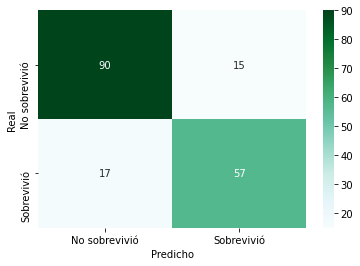

In [152]:
plt.figure(figsize=(6,4))

sns.heatmap(matriz_conf_df,
            annot=True, 
            cmap="BuGn",
            fmt="d")
pass

### Validación del Modelo

In [153]:
X_val = test_titanic
predicted_DT = gs_gradient_boosting.predict(X_val)
predicted_DT

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [154]:
len(predicted_DT)

418

In [155]:
# Cargamos los resultados predichos por nuestro Decission Tree Classifier

titanic_prediction = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": predicted_DT
})
titanic_prediction.to_csv("Titanic_prediction.csv", index=False)

In [156]:
pd.read_csv("Titanic_prediction.csv")

PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]

In [157]:
!kaggle competitions submit titanic -f Titanic_prediction.csv -m "Decision Tree"

Successfully submitted to Titanic - Machine Learning from Disaster


  0%|          | 0.00/3.18k [00:00<?, ?B/s]
100%|##########| 3.18k/3.18k [00:00<00:00, 27.7kB/s]
100%|##########| 3.18k/3.18k [00:02<00:00, 1.27kB/s]


In [158]:
!kaggle competitions submissions titanic

fileName                date                 description    status    publicScore  privateScore  
----------------------  -------------------  -------------  --------  -----------  ------------  
Titanic_prediction.csv  2021-03-03 16:39:59  Decision Tree  complete  0.76794      None          
Titanic_prediction.csv  2021-03-02 19:16:43  Decision Tree  complete  0.23444      None          


# ¡ FIN !

[Perfil de GitHub](https://github.com/JosepLopezZ)


[Perfil de LinkedIn](https://www.linkedin.com/in/josep-lopez-lizarte/)